In [117]:
!pip install plotly

# Analyse exploratoire d'un jeu de données sur les publicités Facebook

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data=pd.read_csv("KAG_conversion_data.csv")
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.3+ KB


## Informations sur les colonnes:

1143 lignes, 11 colonnes


1. ad_id: identifiant unique pour chaque pub
2. xyz_campain_id: identifiant unique pour chaque annonce
3. fb_campain_id: identifiant associé a la maniere dont fb suit la campagne
4. age: age de la personne a qui la pub est diffusée
5. gender: sexe de la personne a qui la pub est diffusée
6. interest: code spécifiant la categorie a laquelle appartient la personne (se refere aux intérets précisés dans le profil public Fb de la personne)
7. Impression: nb de diffusion de la pub
8. Clicks: nombre de clics sur cette annonce
9. Spent: montant payé par l'entreprise pour diffuser l'annonce
10. Total_Conversion: nombre total de personnes ayant demandé des informations sur le produit apres avoir vu l'annonce.
11. Approved_Convertion: nombre total de personnes ayant acheté le produit apres avoir vu l'annonce

On peut voir que la plupart des variables sont numériques mais que 2 sont des caractères (gender & age), on peut en retourner des valeurs numériques.



In [121]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [122]:
data.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [123]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

data_copy=data.copy()

In [124]:
data_copy.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [125]:
data_copy.age[data_copy.age=='30-34']=32
data_copy.age[data_copy.age=='35-39']=37
data_copy.age[data_copy.age=='40-44']=42
data_copy.age[data_copy.age=='45-49']=47

In [126]:
data_copy.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,32,M,15,7350,1,1.43,2,1
1,708749,916,103917,32,M,16,17861,2,1.82,2,0
2,708771,916,103920,32,M,20,693,0,0.00,1,0
3,708815,916,103928,32,M,28,4259,1,1.25,1,0
4,708818,916,103928,32,M,28,4133,1,1.29,1,1


In [127]:
data_copy.age=data_copy.age.astype(np.int64)
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null int64
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 98.3+ KB


On convertit le genre en entier comme 'M'=0 et 'F'=1

In [128]:
data_copy.gender[data_copy.gender=='M']=0
data_copy.gender[data_copy.gender=='F']=1
data_copy.gender=data_copy.gender.astype(np.int64)
data_copy.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,32,0,15,7350,1,1.43,2,1
1,708749,916,103917,32,0,16,17861,2,1.82,2,0
2,708771,916,103920,32,0,20,693,0,0.00,1,0
3,708815,916,103928,32,0,28,4259,1,1.25,1,0
4,708818,916,103928,32,0,28,4133,1,1.29,1,1


In [129]:
#campagnes ayant le plus fait cliquer
data_copy.sort_values(by='Clicks', ascending=False).head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
860,1121814,1178,144659,32,1,27,2223278,421,612.300003,38,13
1026,1122265,1178,144734,47,1,27,1428421,367,541.700002,10,0
765,1121601,1178,144624,47,0,16,2286228,353,603.380002,16,7
995,1122193,1178,144722,47,1,10,1358324,346,465.079998,8,2
525,1121100,1178,144532,32,0,15,3052003,340,639.949998,60,17


Maintenant qu on a converti nos variables en colonnes numériques. On peut commencer une analyse non supervisée, on commence avec une carte de chaleur avec clustering hierarchique pour voir quelles relations apparaissent. Comme on a transformé nos données l ensemble des
variables en données numériques, on peut les convertir en matrice et utiliser la fonction heatmap qui nous permet de voir un apercu rapide de nos données

In [130]:
corr_data=data_copy.corr()
corr_data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.089168,-0.058324,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.089693,-0.086118,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.100013,-0.038037,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
age,0.089168,0.089693,0.100013,1.000000,0.059958,0.043709,0.101209,0.206907,0.190524,-0.066559,-0.082404
gender,-0.058324,-0.086118,-0.038037,0.059958,1.000000,0.047230,0.067059,0.168725,0.125022,0.027559,-0.025350
interest,0.456483,0.272282,0.595753,0.043709,0.047230,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101209,0.067059,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.206907,0.168725,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.190524,0.125022,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,-0.066559,0.027559,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034


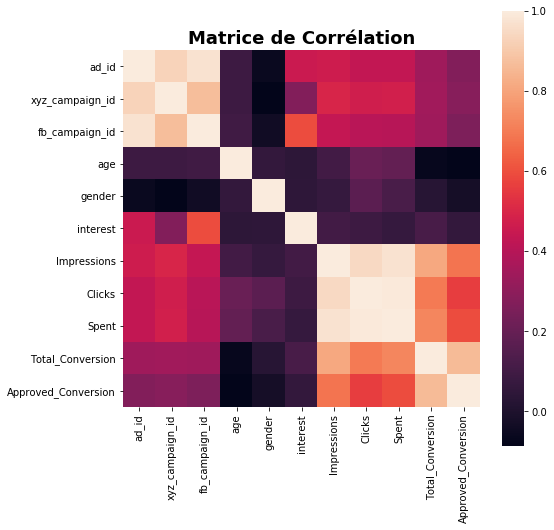

In [131]:
f, ax=plt.subplots(figsize=(8,8))
plt.title('Matrice de Corrélation', fontsize=18, fontweight= 'bold')
sns.heatmap(corr_data, square=True)
plt.show()

Il est préférable d ajouter des fonctionnnalités supplémentaires indicateurs de la performance dans le jeu de données:
 - taux de clics: pourcentage des impressions qui sont devenues des clics. Pourcentage élevé signifie un bon ciblage.
 - taux conversion: pourcentage de clics qui se transforme en 'conversion'. Dépendra du but de la campagne pub.
 - cout/clic: on souhaite le réduire 
 - cout par conversion: combine coup/clic et taux convertion.

D'autres valeurs peuvent etre envisagées: valeur de conversion qui permettra de determiner un cout cible par conversion (en fonction du produit/cible/rapport totalconvertion-approvedconvertion)

La connaissance des valeurs de conversion permettent de calculer d autres indicateurs de performance (comme le retour sur investissement publicitaire), il peut indiquer le rendement d'une campagne

In [132]:
data_add=data_copy.copy()
data_add['Tx_Clicks']=(data_add['Clicks']/data_add['Impressions'])*100
data_add['Tx_Conversion']=data_add['Spent']/data_add['Clicks']
data_add.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Tx_Clicks,Tx_Conversion
0,708746,916,103916,32,0,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,32,0,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,32,0,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,32,0,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,32,0,28,4133,1,1.29,1,1,0.024195,1.29


In [133]:
data_extract=data_add.copy()
data_extract=data_add[['Tx_Conversion', 'Tx_Clicks','Approved_Conversion', 'Total_Conversion', 'Impressions', 'Spent', 'Clicks']]
data_extract.head()

,Tx_Conversion,Tx_Clicks,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
0,1.43,0.013605,1,2,7350,1.43,1
1,0.91,0.011198,0,2,17861,1.82,2
2,NaN,0.000000,0,1,693,0.00,0
3,1.25,0.023480,0,1,4259,1.25,1
4,1.29,0.024195,1,1,4133,1.29,1


In [134]:
corr_extract=data_extract.corr()
corr_extract

,Tx_Conversion,Tx_Clicks,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
Tx_Conversion,1.000000,-0.378854,0.170040,0.160828,0.208556,0.165464,0.112676
Tx_Clicks,-0.378854,1.000000,-0.006602,0.010721,0.075914,0.140952,0.159290
Approved_Conversion,0.170040,-0.006602,1.000000,0.864034,0.684249,0.593178,0.559526
Total_Conversion,0.160828,0.010721,0.864034,1.000000,0.812838,0.725379,0.694632
Impressions,0.208556,0.075914,0.684249,0.812838,1.000000,0.970386,0.948514
Spent,0.165464,0.140952,0.593178,0.725379,0.970386,1.000000,0.992906
Clicks,0.112676,0.159290,0.559526,0.694632,0.948514,0.992906,1.000000


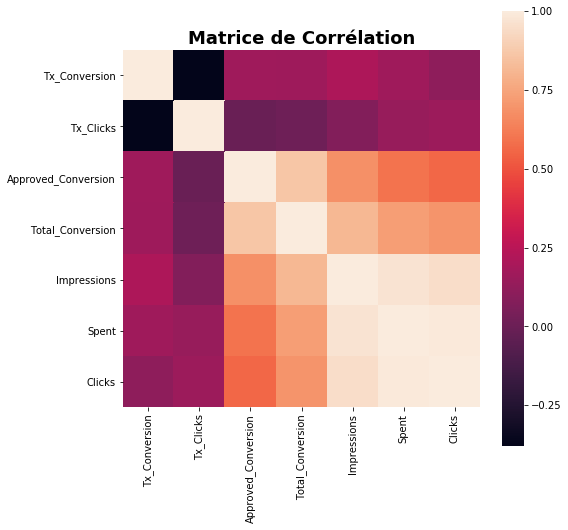

In [135]:
f, ax=plt.subplots(figsize=(8,8))
plt.title('Matrice de Corrélation', fontsize=18, fontweight='bold')
sns.heatmap(corr_extract, square=True)
plt.show()

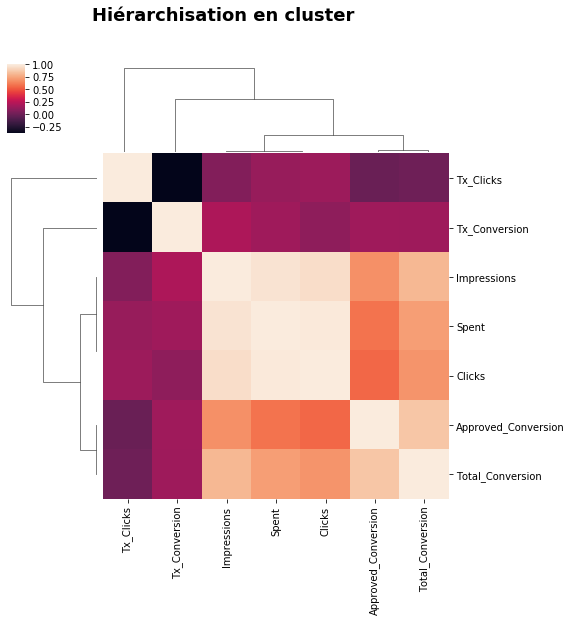

In [136]:
sns.clustermap(corr_extract, square=True,method='complete', metric='correlation', figsize=(8,8)).fig.suptitle('Hiérarchisation en cluster', fontsize=18, fontweight='bold')
plt.show()

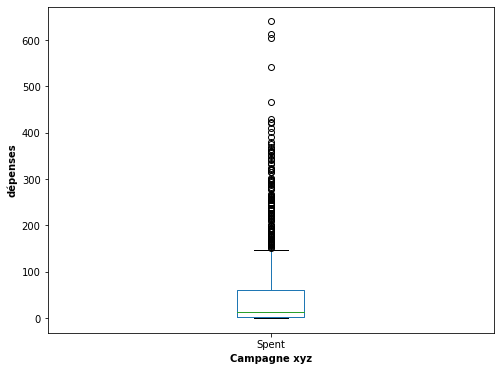

In [137]:
data_add.plot(x='xyz_campaign_id', y='Spent', kind='box', figsize=(8,6))
plt.xlabel('Campagne xyz', fontweight='bold')
plt.ylabel('dépenses', fontweight='bold')
plt.show()

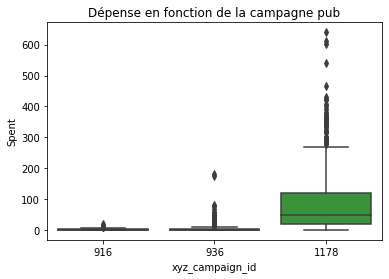

In [138]:
sns.boxplot(y='Spent', x='xyz_campaign_id', data=data_add).set_title('Dépense en fonction de la campagne pub')
figsize=(8,8)
plt.show()

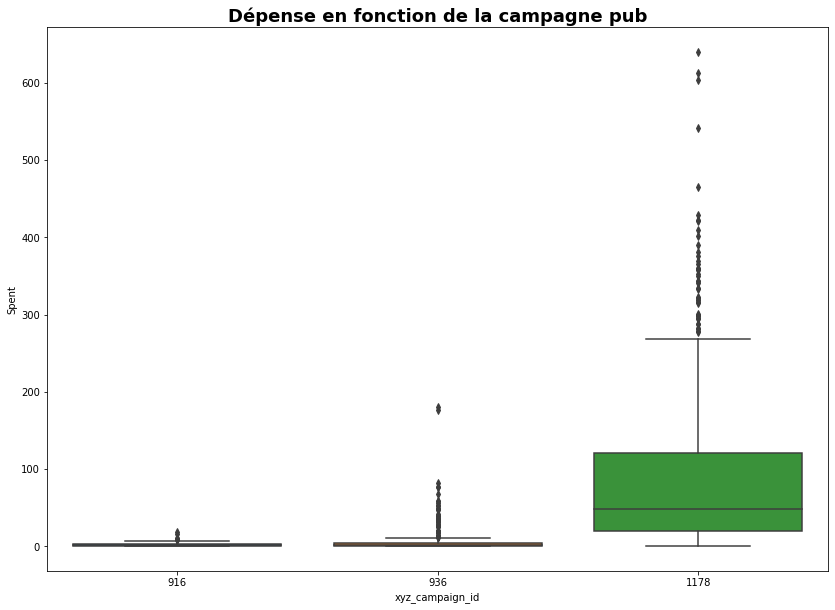

In [139]:
fig, ax=plt.subplots()
fig.set_size_inches(14,10)
sns.boxplot(y='Spent', x='xyz_campaign_id', data=data_add).set_title('Dépense en fonction de la campagne pub', fontsize=18,fontweight='bold')
plt.show()

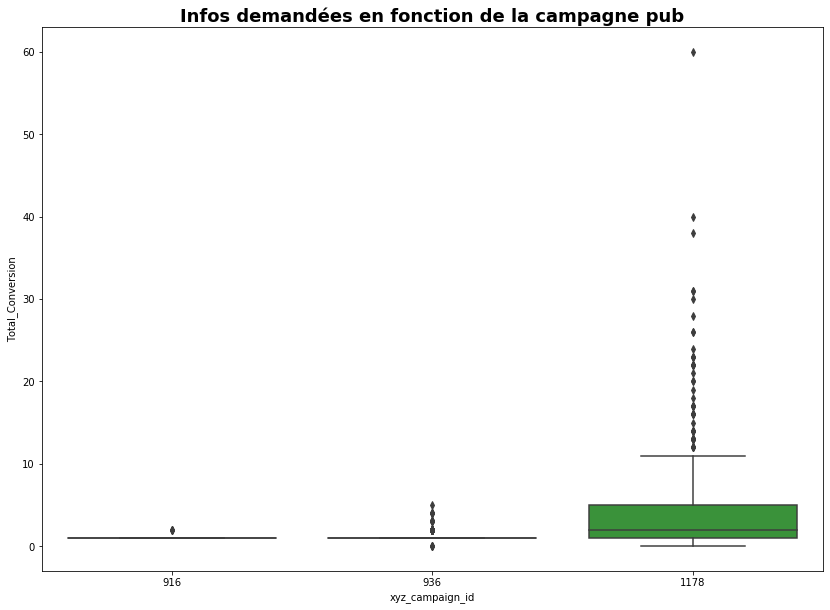

In [140]:
fig, ax=plt.subplots()
fig.set_size_inches(14,10)
sns.boxplot(y='Total_Conversion', x='xyz_campaign_id', data=data_add).set_title('Infos demandées en fonction de la campagne pub', fontsize=18, fontweight='bold')
plt.show()

On s'apperçoit que la campagne ayant 1178 pour ID est la plus performante. On se restraint donc a l'étude de données qui ne suivent que cette campagne avec des heatmaps.

In [141]:
data_1178=data_copy[data_copy['xyz_campaign_id'].isin([1178])]
data_1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
518,1121091,1178,144531,32,0,10,1194718,141,254.049996,28,14
519,1121092,1178,144531,32,0,10,637648,67,122.400000,13,5
520,1121094,1178,144531,32,0,10,24362,0,0.000000,1,1
521,1121095,1178,144531,32,0,10,459690,50,86.330001,5,2
522,1121096,1178,144531,32,0,10,750060,86,161.909999,11,2


In [142]:
percent_missing=data_1178.isnull().sum()*100/len(data_1178)
percent_missing

ad_id                  0.0
xyz_campaign_id        0.0
fb_campaign_id         0.0
age                    0.0
gender                 0.0
interest               0.0
Impressions            0.0
Clicks                 0.0
Spent                  0.0
Total_Conversion       0.0
Approved_Conversion    0.0
dtype: float64

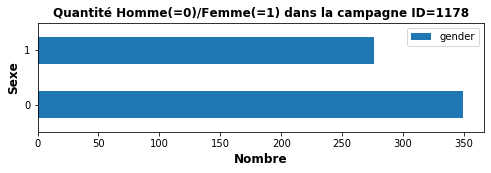

In [143]:
data_1178['gender'].value_counts().plot(figsize=(8,2),kind='barh').set_title('Quantité Homme(=0)/Femme(=1) dans la campagne ID=1178', fontsize=12, fontweight='bold')
plt.ylabel('Sexe', fontweight='bold', fontsize=12)
plt.xlabel('Nombre', fontweight='bold', fontsize=12)
plt.legend()
plt.show()

In [144]:
data_1178['gender'].value_counts()

0    349
1    276
Name: gender, dtype: int64

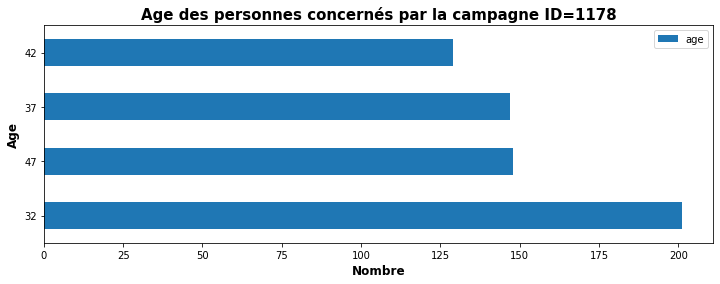

In [145]:
data_1178['age'].value_counts().plot(figsize=(12,4),kind='barh').set_title('Age des personnes concernés par la campagne ID=1178', fontsize=15, fontweight='bold')
plt.ylabel('Age', fontweight='bold', fontsize=12)
plt.xlabel('Nombre', fontweight='bold', fontsize=12)
plt.legend()
plt.show()

In [146]:
data_1178['age'].value_counts()

32    201
47    148
37    147
42    129
Name: age, dtype: int64

In [147]:
data_c_1178=data.copy()
data_c_1178=data_c_1178[data_c_1178['xyz_campaign_id'].isin([1178])]

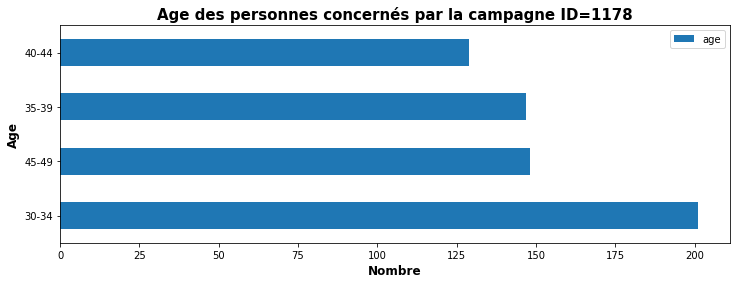

In [148]:
data_c_1178['age'].value_counts().plot(figsize=(12,4),kind='barh').set_title('Age des personnes concernés par la campagne ID=1178', fontsize=15, fontweight='bold')
plt.ylabel('Age', fontweight='bold', fontsize=12)
plt.xlabel('Nombre', fontweight='bold', fontsize=12)
plt.legend()
plt.show()

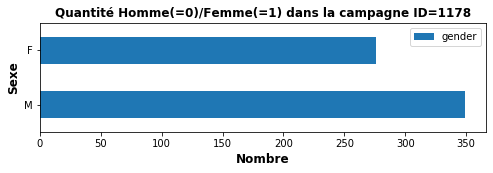

In [149]:
data_c_1178['gender'].value_counts().plot(figsize=(8,2),kind='barh').set_title('Quantité Homme(=0)/Femme(=1) dans la campagne ID=1178', fontsize=12, fontweight='bold')
plt.ylabel('Sexe', fontweight='bold', fontsize=12)
plt.xlabel('Nombre', fontweight='bold', fontsize=12)
plt.legend()
plt.show()

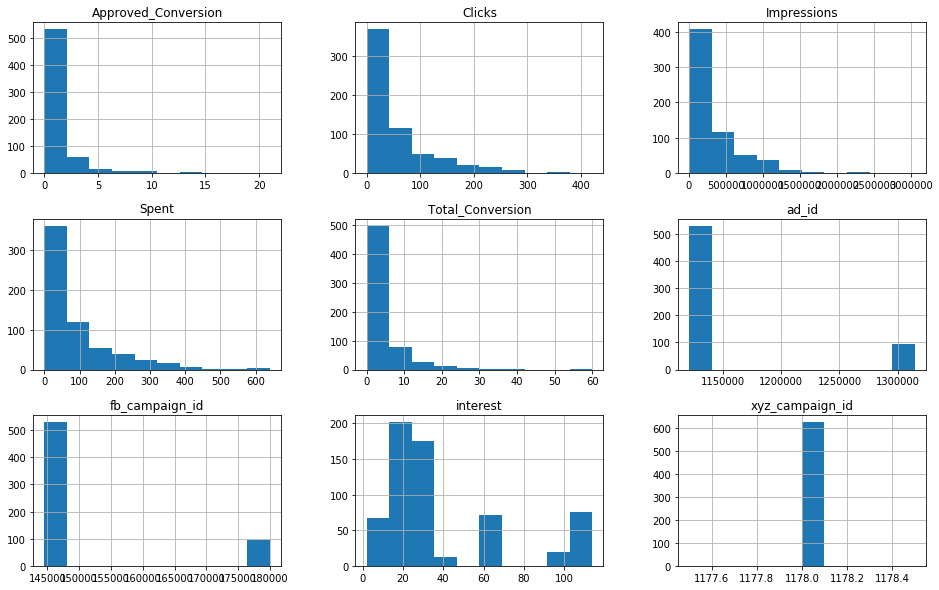

In [150]:
data_c_1178.hist(figsize=(16,10))
plt.show()

In [151]:
corr_c_1178=data_c_1178.corr()
corr_c_1178

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,NaN,1.000000,0.883846,0.024332,-0.000593,-0.024681,0.099677,0.024641
xyz_campaign_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fb_campaign_id,1.000000,NaN,1.000000,0.883847,0.024452,-0.000511,-0.024585,0.099802,0.024736
interest,0.883846,NaN,0.883847,1.000000,-0.038650,-0.046172,-0.072921,0.033883,-0.022507
Impressions,0.024332,NaN,0.024452,-0.038650,1.000000,0.933461,0.961916,0.790266,0.671312
Clicks,-0.000593,NaN,-0.000511,-0.046172,0.933461,1.000000,0.990799,0.646280,0.520285
Spent,-0.024681,NaN,-0.024585,-0.072921,0.961916,0.990799,1.000000,0.683936,0.561517
Total_Conversion,0.099677,NaN,0.099802,0.033883,0.790266,0.646280,0.683936,1.000000,0.870572
Approved_Conversion,0.024641,NaN,0.024736,-0.022507,0.671312,0.520285,0.561517,0.870572,1.000000


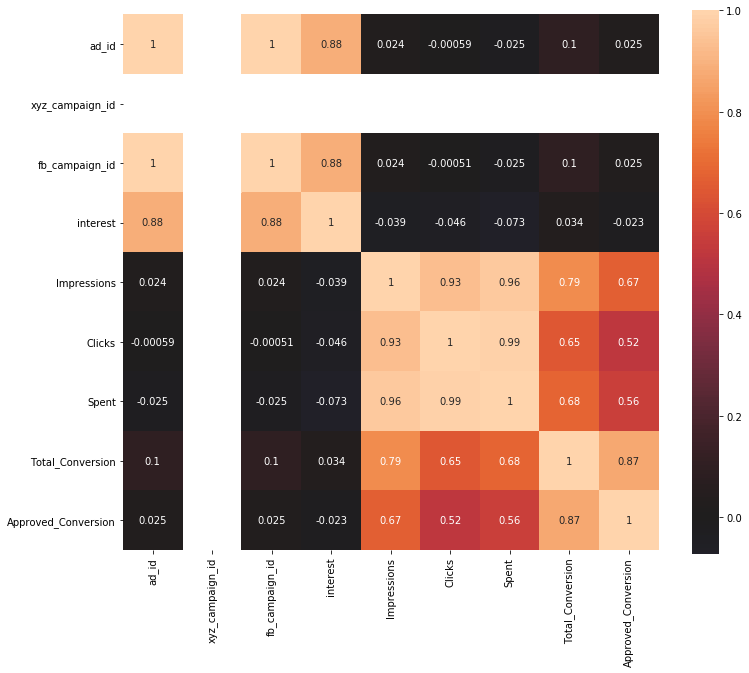

In [152]:
cmap=sns.diverging_palette(5,250, as_cmap=True)

f, ax=plt.subplots(figsize=(12,10))
sns.heatmap(corr_c_1178, square=True, center=0, xticklabels=corr_c_1178.columns, yticklabels=corr_c_1178.columns, annot=True)
plt.show()

In [153]:
corr_1178=data_1178.corr()
corr_1178

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,NaN,1.000000,0.075088,0.093958,0.883846,0.024332,-0.000593,-0.024681,0.099677,0.024641
xyz_campaign_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fb_campaign_id,1.000000,NaN,1.000000,0.075114,0.093969,0.883847,0.024452,-0.000511,-0.024585,0.099802,0.024736
age,0.075088,NaN,0.075114,1.000000,0.033544,0.052935,0.067288,0.220876,0.195207,-0.147109,-0.143348
gender,0.093958,NaN,0.093969,0.033544,1.000000,0.086057,0.158023,0.300168,0.235329,0.081528,0.008685
interest,0.883846,NaN,0.883847,0.052935,0.086057,1.000000,-0.038650,-0.046172,-0.072921,0.033883,-0.022507
Impressions,0.024332,NaN,0.024452,0.067288,0.158023,-0.038650,1.000000,0.933461,0.961916,0.790266,0.671312
Clicks,-0.000593,NaN,-0.000511,0.220876,0.300168,-0.046172,0.933461,1.000000,0.990799,0.646280,0.520285
Spent,-0.024681,NaN,-0.024585,0.195207,0.235329,-0.072921,0.961916,0.990799,1.000000,0.683936,0.561517
Total_Conversion,0.099677,NaN,0.099802,-0.147109,0.081528,0.033883,0.790266,0.646280,0.683936,1.000000,0.870572


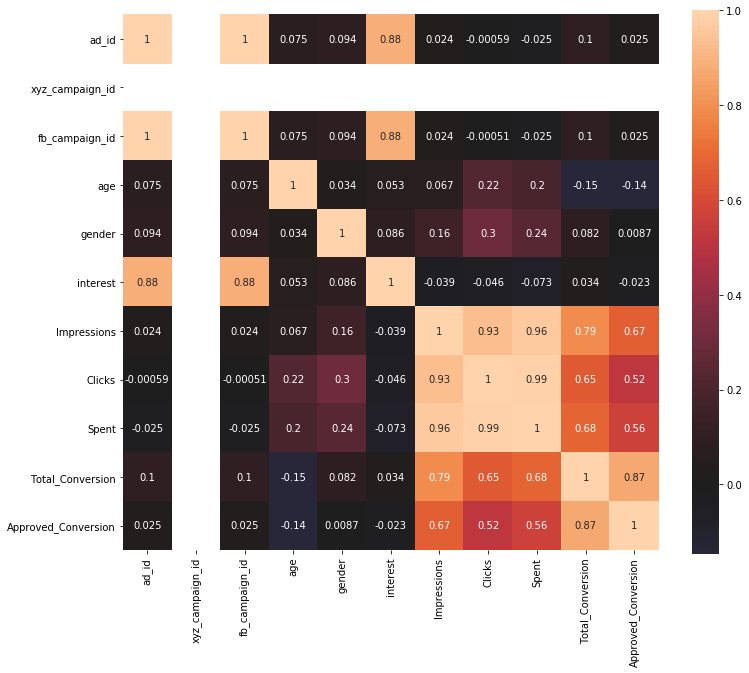

In [154]:
cmap=sns.diverging_palette(5,250, as_cmap=True)

f, ax=plt.subplots(figsize=(12,10))
sns.heatmap(corr_1178, square=True, center=0, xticklabels=corr_1178.columns, yticklabels=corr_1178.columns, annot=True)
plt.show()

Cet aperçu de l'ensemble de données nous permet d'avoir une idée de ce qui se passe avec les variables de cette campagne. Nous avons une idée des distributions et on peut commencer à réfléchir aux analyses qu'on pourrait en faire.


On n'a pas les chiffres réels mais on peut faire des suppositions sur les différents tarifs appliqués (<strong>arbitrairement</strong>: une demande: conv_total vaudra 5 et conv_approved une vente vaudrait 100). On peut créer des variables en fonction de ces valeurs.

In [155]:
data_add_1178=data_c_1178.copy()
data_add_1178['Total_Conv']=(data_add_1178['Total_Conversion']+data_add_1178['Approved_Conversion'])
data_add_1178['Conv_Val']=(data_add_1178['Total_Conversion']*5)
data_add_1178['App_Conv_Val']=data_add_1178['Approved_Conversion']*100
data_add_1178['Total_Conv_Val']=data_add_1178['Conv_Val']+data_add_1178['App_Conv_Val']
data_add_1178['Cout_Par_Conv']=data_add_1178['Spent']/data_add_1178['Total_Conv']
data_add_1178['Retour_Investissement']=data_add_1178['Total_Conv_Val']/data_add_1178['Spent']
data_add_1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Total_Conv,Conv_Val,App_Conv_Val,Total_Conv_Val,Cout_Par_Conv,Retour_Investissement
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,42,140,1400,1540,6.048809,6.061799
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,18,65,500,565,6.800000,4.616013
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,2,5,100,105,0.000000,inf
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,7,25,200,225,12.332857,2.606278
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,13,55,200,255,12.454615,1.574949


On peut introduire un autre indicateur de performance: le coût de mille diffusions ("Impresssions").<br>On le note Cout_Par_Mille

In [156]:
data_add_1178['Cout_Par_Mille']=(data_add_1178['Spent']/data_add_1178['Impressions'])*1000
data_add_1178

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Total_Conv,Conv_Val,App_Conv_Val,Total_Conv_Val,Cout_Par_Conv,Retour_Investissement,Cout_Par_Mille
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,42,140,1400,1540,6.048809,6.061799,0.212644
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,18,65,500,565,6.800000,4.616013,0.191955
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,2,5,100,105,0.000000,inf,0.000000
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,7,25,200,225,12.332857,2.606278,0.187800
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,13,55,200,255,12.454615,1.574949,0.215863
523,1121097,1178,144532,30-34,M,15,30068,1,1.820000,1,0,1,5,0,5,1.820000,2.747253,0.060529
524,1121098,1178,144532,30-34,M,15,1267550,123,236.769999,24,10,34,120,1000,1120,6.963823,4.730329,0.186793
525,1121100,1178,144532,30-34,M,15,3052003,340,639.949998,60,17,77,300,1700,2000,8.311039,3.125244,0.209682
526,1121101,1178,144532,30-34,M,15,29945,1,1.590000,2,1,3,10,100,110,0.530000,69.182389,0.053097
527,1121102,1178,144532,30-34,M,15,357856,30,52.970000,7,3,10,35,300,335,5.297000,6.324335,0.148020


In [157]:
data_add_1178.sort_values(by='Retour_Investissement', ascending=False).head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Total_Conv,Conv_Val,App_Conv_Val,Total_Conv_Val,Cout_Par_Conv,Retour_Investissement,Cout_Par_Mille
719,1121477,1178,144603,40-44,M,21,7073,0,0.0,1,0,1,5,0,5,0.0,inf,0.0
658,1121359,1178,144583,35-39,M,26,7573,0,0.0,1,0,1,5,0,5,0.0,inf,0.0
520,1121094,1178,144531,30-34,M,10,24362,0,0.0,1,1,2,5,100,105,0.0,inf,0.0
882,1121854,1178,144666,30-34,F,63,8587,0,0.0,1,0,1,5,0,5,0.0,inf,0.0
851,1121791,1178,144655,30-34,F,23,6838,0,0.0,1,0,1,5,0,5,0.0,inf,0.0


On voit qu'il y a des colonnes dont les pubs n'ont pas généré de clics, ca a pour conséquence d'indiquer un retour sur investissement ayant une valeur infinie (c'est possiblement une erreur d'entrée ou d'attribution du clic).
Les objectifs de campagne vont déterminer le type d'analyses a faire, dans le cas présent, on se limite a une analyse exploratoire. (Du point de vue de l'entreprise, on essaiera ici de maximiser nos revenus)
On observe les nombres/valeurs des 'conversions' (nb de personnes qui demandent des infos) et les conséquences dessus quand on dépense plus d'argent dans la campagne.

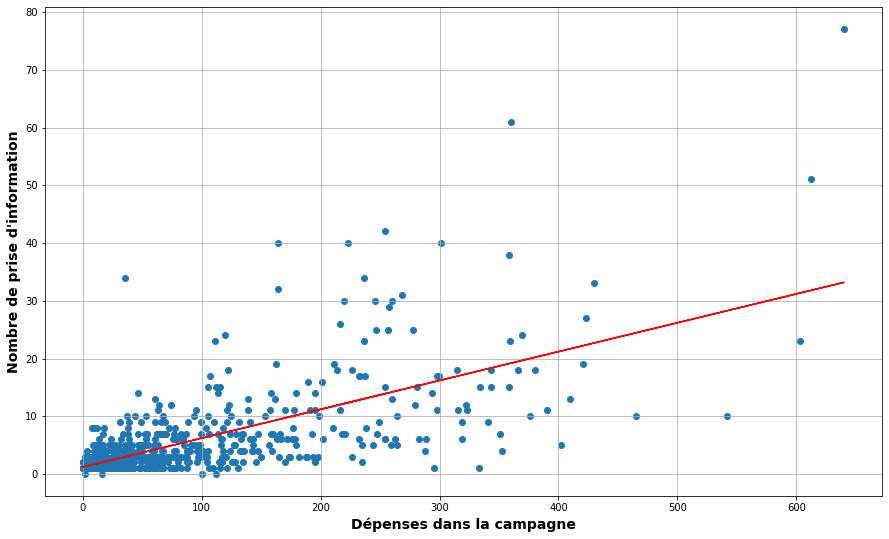

In [158]:
from sklearn.linear_model import LinearRegression
from scipy import stats
def predict(x):
    return slope*x+intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(data_add_1178['Spent'], data_add_1178['Total_Conv'])

plt.figure(figsize=(15,9))
plt.scatter(data_add_1178['Spent'], data_add_1178['Total_Conv'])
axes=plt.axes()
axes.grid()
plt.xlabel("Dépenses dans la campagne", fontweight='bold', fontsize=14)
plt.ylabel("Nombre de prise d'information", fontweight='bold', fontsize=14)

fitLine=predict(data_add_1178['Spent'])
plt.plot(data_add_1178['Spent'], fitLine, c='r')
plt.show()

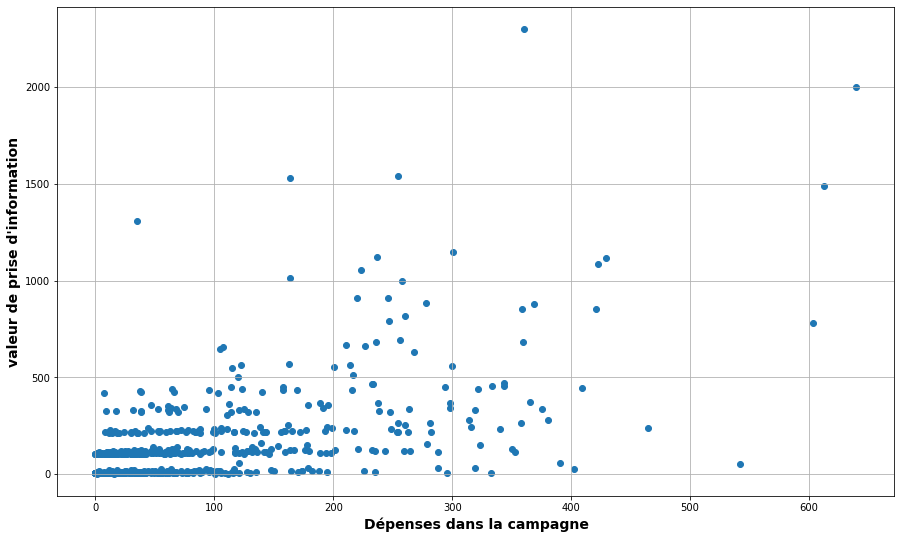

In [159]:
plt.figure(figsize=(15,9))
plt.scatter(data_add_1178['Spent'], data_add_1178['Total_Conv_Val'])
axes=plt.axes()
axes.grid()
plt.xlabel("Dépenses dans la campagne", fontweight='bold', fontsize=14)
plt.ylabel("valeur de prise d'information", fontweight='bold', fontsize=14)
plt.show()

A premiere vue, on voit que plus on investit, plus on est récompensé.Ceci dit, on a peu d'infors sur les forts investissements.<br>
On va aussi s'intéresser aux données en fonction du genre

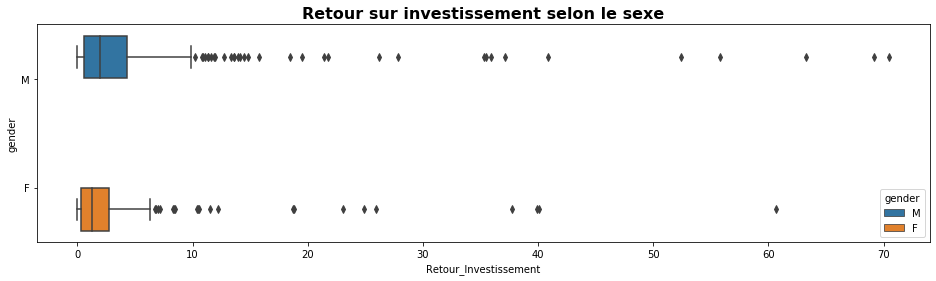

In [160]:
plt.figure(figsize=(16,4))
plt.title("Retour sur investissement selon le sexe",fontsize=16, fontweight='bold')
sns.boxplot(data=data_add_1178, x='Retour_Investissement', y='gender', hue='gender')
plt.show()

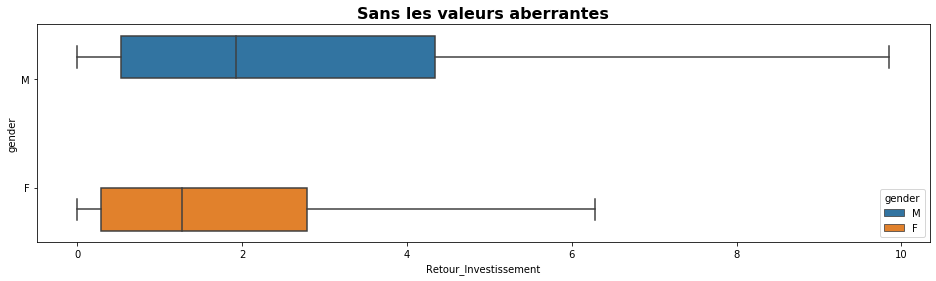

In [161]:
plt.figure(figsize=(16,4))
plt.title("Sans les valeurs aberrantes",fontsize=16, fontweight='bold')
sns.boxplot(data=data_add_1178, x='Retour_Investissement', y='gender', showfliers=False, hue='gender')
plt.show()

Test de Wilcoxon pour tester l'hypothese de proximité des deux groupes.

### TEEEEESTS ratés pb de dimension pour test de wilcoxon

<strong>wilcox.test(weight ~ group, data = my_data)</strong>

In [162]:
data_add_1178.gender[data_add_1178.gender=='M']=0
data_add_1178.gender[data_add_1178.gender=='F']=1
from scipy.stats import wilcoxon
w,p=wilcoxon(data_add_1178.gender,data_add_1178.Retour_Investissement, zero_method='wilcox')

data_add_1178.gender[data_add_1178.gender==0]='M'
data_add_1178.gender[data_add_1178.gender==1]='F'
w,p

(24074.0, 1.0147247275416819e-59)

In [163]:
data_testract=data_add_1178.copy()
data_testract.Retour_Investissement.head()

518    6.061799
519    4.616013
520         inf
521    2.606278
522    1.574949
Name: Retour_Investissement, dtype: float64

In [164]:
data_testracted=data_testract[data_testract.Clicks!=0]
df1178=data_testracted.copy()
data_testracted.gender[data_add_1178.gender=='M']=0
data_testracted.gender[data_add_1178.gender=='F']=1
w,p=wilcoxon(data_testracted.gender,data_testracted.Retour_Investissement, correction=True)
w,p

(24074.0, 3.834877548214648e-57)

In [165]:
df2=data_testracted[["gender", "Retour_Investissement"]]
df3=df2[df2['gender']==0]
df4=df2[df2['gender']==1]

In [166]:
#w,p=wilcoxon(df3.Retour_Investissement, df4.Retour_Investissement, paired=False)

### suite notebook

In [167]:
df1178[["gender", "Retour_Investissement"]].head()

,gender,Retour_Investissement
518,M,6.061799
519,M,4.616013
521,M,2.606278
522,M,1.574949
523,M,2.747253


In [168]:
df9=df1178['Retour_Investissement'].groupby([df1178['gender']]).median()
df9=df9+df1178['Retour_Investissement'].groupby([df1178['gender']]).mean()

In [169]:
print("Médiane du retour sur investissement en fonction du sexe:\n",df9)

Médiane du retour sur investissement en fonction du sexe:
 gender
F    4.044225
M    6.386841
Name: Retour_Investissement, dtype: float64


In [170]:
gender_group=df1178.groupby('gender')
print("Moyenne du retour sur investissement en fonction du sexe:\n",gender_group['Retour_Investissement'].mean())
print("\nValeur médiane du retour sur investissement en fonction du sexe:\n", gender_group['Retour_Investissement'].median())

Moyenne du retour sur investissement en fonction du sexe:
 gender
F    2.819170
M    4.504569
Name: Retour_Investissement, dtype: float64

Valeur médiane du retour sur investissement en fonction du sexe:
 gender
F    1.225055
M    1.882272
Name: Retour_Investissement, dtype: float64


In [171]:
gender_info=gender_group['Retour_Investissement'].describe()
gender_info

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,272.0,2.819170,6.309675,0.0,0.280390,1.225055,2.726872,60.693641
M,341.0,4.504569,9.154775,0.0,0.470367,1.882272,4.140693,70.469798


In [172]:
dfgi=gender_info[['mean']]
dfgi['median']=pd.Series(gender_group['Retour_Investissement'].median(), index=dfgi.index)

In [173]:
dfgi

,mean,median
gender,,
F,2.819170,1.225055
M,4.504569,1.882272


Le retour sur investissement semble etre plus élevé chez les hommes que chez les femmes (différence statistiquement significative oui si p<0.01?)<br>
La médiane (ainsi que les quantiles) nous donne une estimation plus précise de ce que pourrait être notre retour sur investissement. Les différences entre retour sur investissement en fonction du sexe est importante et pourraient faire la différence entre une campagne rentable ou non.<br>
On va s'intéresser a d'autres variables, commencon par 'interest'

In [174]:
data_add_1178.interest.unique()

array([ 10,  15,  16,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  36,  63,  64,  65,   2,   7,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106], dtype=int64)

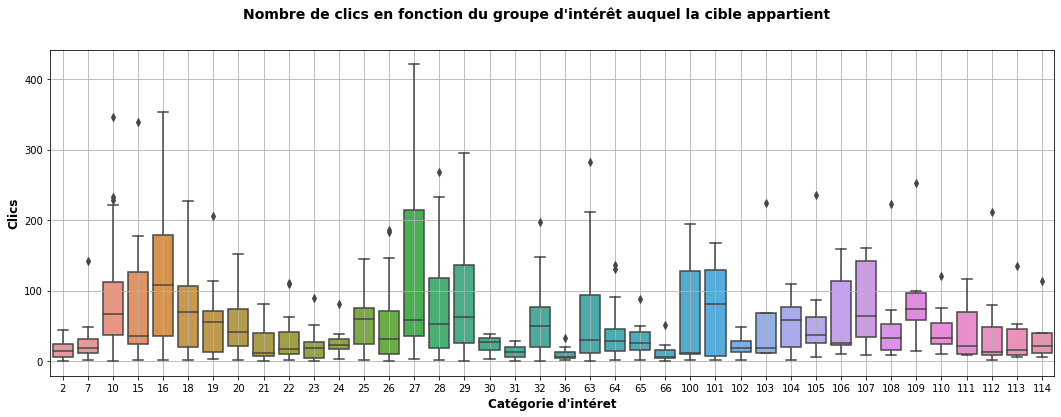

In [175]:
plt.figure(figsize=(18,6))
sns.boxplot(y='Clicks', x='interest', data=data_add_1178).figure.suptitle("Nombre de clics en fonction du groupe d'intérêt auquel la cible appartient" , fontsize=14, fontweight='bold')
axes=plt.axes()
axes.grid()
plt.ylabel('Clics', fontweight='bold', fontsize=12)
plt.xlabel("Catégorie d'intéret", fontweight='bold', fontsize=12)
plt.show()

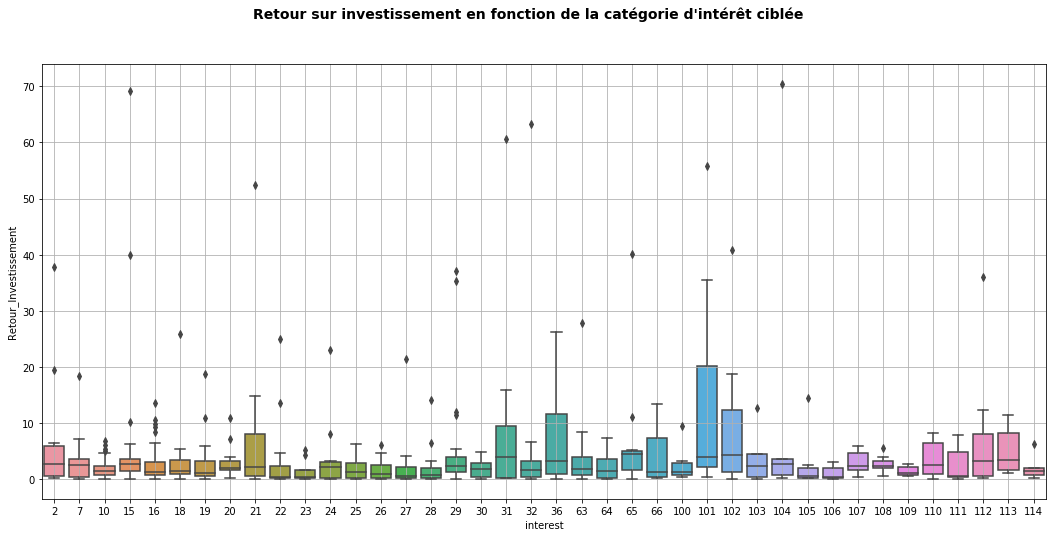

In [176]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data_add_1178, x='interest', y='Retour_Investissement').figure.suptitle("Retour sur investissement en fonction de la catégorie d'intérêt ciblée" , fontsize=14, fontweight='bold')
axes=plt.axes()
axes.grid()
plt.show()

In [177]:
interest_group=data_add_1178.groupby('interest')
interest_info=interest_group['Retour_Investissement'].describe()
interest_info

,count,mean,std,min,25%,50%,75%,max
interest,,,,,,,,
2,18.0,inf,NaN,0.226757,0.624988,2.737233,5.913136,inf
7,14.0,3.327737,4.786029,0.000000,0.422929,2.478757,3.518854,18.424036
10,35.0,inf,NaN,0.060768,0.692610,1.363255,2.329412,inf
15,20.0,7.889540,16.809687,0.042564,1.492419,2.685470,3.526515,69.182389
16,38.0,2.788324,3.398330,0.016918,0.805872,1.295673,3.095113,13.619855
18,20.0,3.094686,5.564381,0.015015,0.975552,1.362914,3.365393,25.925925
19,23.0,2.761127,4.260667,0.086296,0.510656,1.148350,3.181779,18.750000
20,24.0,2.584664,2.346963,0.122639,1.521809,2.049061,3.238706,10.847107
21,22.0,inf,NaN,0.075313,0.540099,2.187860,8.106256,inf


#### On retire les pubs n'ayant pas généré de clic

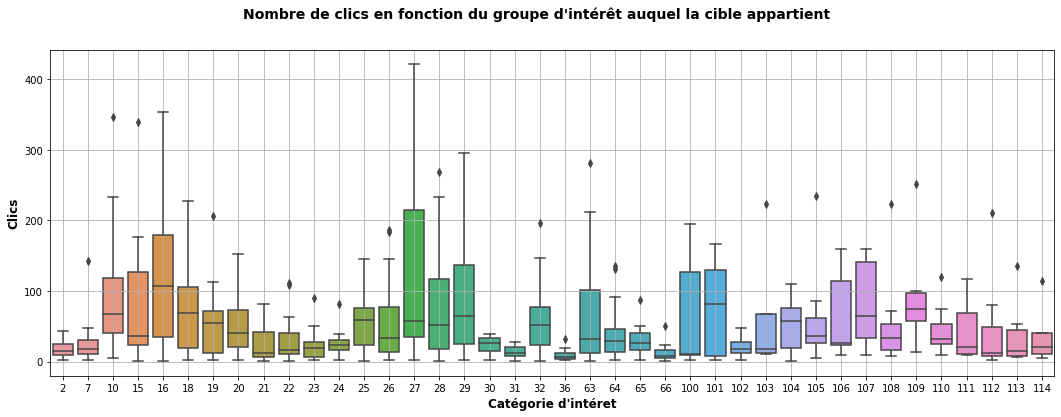

In [178]:
data_testracted.gender[data_testracted.gender==0]='M'
data_testracted.gender[data_testracted.gender==1]='F'
plt.figure(figsize=(18,6))
sns.boxplot(y='Clicks', x='interest', showfliers=True, data=data_testracted).figure.suptitle("Nombre de clics en fonction du groupe d'intérêt auquel la cible appartient" , fontsize=14, fontweight='bold')
axes=plt.axes()
axes.grid()
plt.ylabel('Clics', fontweight='bold', fontsize=12)
plt.xlabel("Catégorie d'intéret", fontweight='bold', fontsize=12)
plt.show()

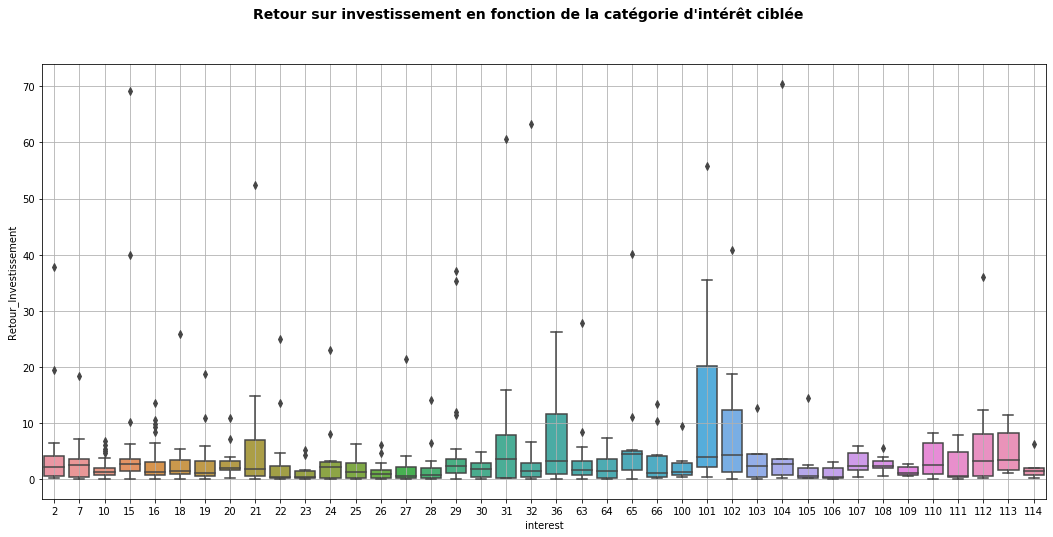

In [179]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data_testracted, x='interest', y='Retour_Investissement', showfliers=True).figure.suptitle("Retour sur investissement en fonction de la catégorie d'intérêt ciblée" , fontsize=14, fontweight='bold')
axes=plt.axes()
axes.grid()
plt.show()

##### représentation des moyennes, médianes des retours sur investissement en fonction des groupes de centre d'intéret + nb de clics totaux de pour ces groupes 

In [180]:
tinterest_group=data_testracted.groupby('interest')
tinterest_info=tinterest_group['Retour_Investissement'].describe()
dfii=tinterest_info[['mean']]
dfii['median']=pd.Series(tinterest_group['Retour_Investissement'].median(), index=dfii.index)
dfii['clicks']=pd.Series(tinterest_group['Clicks'].sum(), index=dfii.index)
dfii.sort_values(by='mean', ascending=False).head(15)

,mean,median,clicks
interest,,,
104,15.514689,2.753204,265
101,14.953680,3.958480,524
102,10.356094,4.271845,150
31,8.260249,3.640244,189
112,8.059562,3.214573,339
15,7.889540,2.685470,1554
36,7.379306,3.213555,126
65,6.995963,4.380476,343
21,6.344740,1.772478,493


Certains centres d'intéreêt ont un bon score de retour sur investissement ainsi qu'un bon nombre de clics. On décide d'en pousser un peu l'analyse en distinguant la rentabilité en fonction du sexe, on prendra comme échantillon les interest: 104, 101, 15, 21, 32 et 29.

In [181]:
'''plt.figure(figsize=(16,4))
sns.boxplot(data=data_add_1178, x='Retour_Investissement', y='interest', hue='gender')
plt.show()
'''

"plt.figure(figsize=(16,4))\nsns.boxplot(data=data_add_1178, x='Retour_Investissement', y='interest', hue='gender')\nplt.show()\n"

In [182]:
#interest_a_traiter=(data_add_1178['interest']==104|data_add_1178['interest']==101|data_add_1178['interest']==15|data_add_1178['interest']==21|data_add_1178['interest']==32|data_add_1178['interest']==29)

In [183]:
#interest_traitement=data_add_1178(axis=0, like=('interest'==104))

In [184]:
!pip install rpy2

In [185]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr

In [186]:
base=importr('base')
utils=importr('utils')

In [187]:
import rpy2.robjects.packages as rpackages
utils=rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

rpy2.rinterface.NULL

In [188]:
packnames=('ggplot2', 'hexbin')
from rpy2.robjects.vectors import StrVector

names_to_install=[x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install)>0:
    utils.install_packages(StrVector(names_to_install))

In [189]:
import rpy2.robjects.lib.ggplot2 as ggplot2

In [190]:
data_interest_chosen=data_add_1178[(data_add_1178['interest']==101)|
                                   (data_add_1178['interest']==104)|                                   
                                   (data_add_1178['interest']==15)|
                                   (data_add_1178['interest']==32)|
                                   (data_add_1178['interest']==24)|
                                   (data_add_1178['interest']==21)]

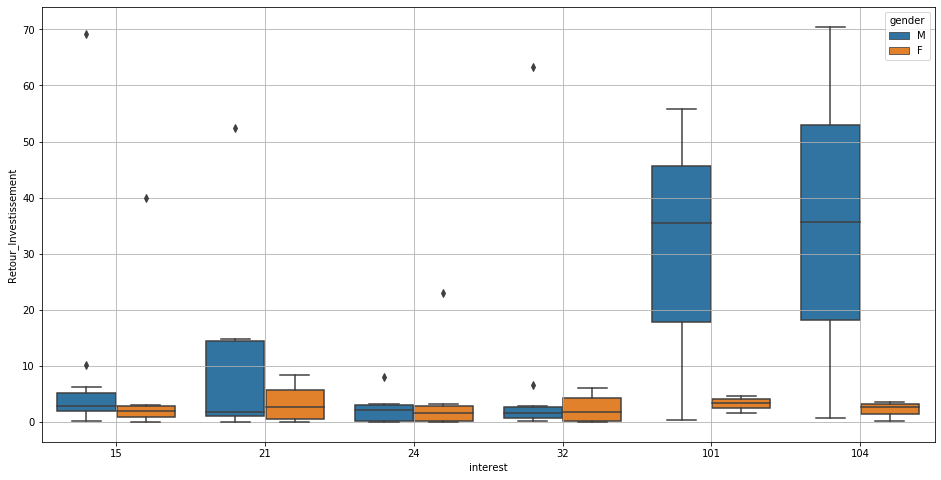

In [191]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_interest_chosen, x='interest', y='Retour_Investissement', hue='gender')
axes=plt.axes()
axes.grid()
plt.show()

Regardons les retours sur investissement suivant la numéro intéret et le sexe

In [192]:
df_gender_interest=data_testracted.groupby(['interest', 'gender'])
#df_gender_interest

In [193]:
tinterest_info=tinterest_group['Retour_Investissement'].describe()
dfii=tinterest_info[['mean']]
dfii['median']=pd.Series(tinterest_group['Retour_Investissement'].median(), index=dfii.index)
dfii['clicks']=pd.Series(tinterest_group['Clicks'].sum(), index=dfii.index)
dfii.sort_values(by='mean', ascending=False).head()

,mean,median,clicks
interest,,,
104,15.514689,2.753204,265
101,14.953680,3.958480,524
102,10.356094,4.271845,150
31,8.260249,3.640244,189
112,8.059562,3.214573,339


In [194]:
df_gender_interest_ri=df_gender_interest['Retour_Investissement'].describe()
dfgirii=df_gender_interest_ri[['mean']]
dfgirii['median_RI']=pd.Series(df_gender_interest['Retour_Investissement'].median(), index=dfgirii.index)
dfgirii['clicks']=pd.Series(df_gender_interest['Clicks'].sum(), index=dfgirii.index)
dfgirii.sort_values(by='mean', ascending=False).head()

,,mean,median_RI,clicks
interest,gender,,,
104,M,35.567346,35.567346,21
101,M,30.528030,35.472973,17
102,M,15.125003,4.271845,36
31,F,11.490547,0.259336,107
65,F,10.529379,4.380476,147


On regarde maintenant avec les valeurs qui nous intéressaient (ie 15, 21, 24, 32, 101, 104)

In [195]:
data_icgi=data_interest_chosen.groupby(['interest', 'gender'])

In [196]:
data_icgiri=data_icgi['Retour_Investissement'].describe()

data_icgiri['median_RI']=pd.Series(data_icgi['Retour_Investissement'].median(), index=data_icgiri.index)
data_icgiri['mean_RI']=pd.Series(data_icgi['Retour_Investissement'].mean(), index=data_icgiri.index)
data_icgiri['clicks']=pd.Series(data_icgi['Clicks'].sum(), index=data_icgiri.index)
data_icgirid=data_icgiri.copy()

data_icgirid=data_icgirid[np.isfinite(data_icgiri['mean_RI'])]
data_icgirid=data_icgirid[['median_RI', 'mean_RI', 'clicks']]
data_icgirid.sort_values(by='mean_RI', ascending=False)


,,median_RI,mean_RI,clicks
interest,gender,,,
104,M,35.567346,35.567346,21
101,M,35.472973,30.528030,17
15,M,2.787577,8.893790,827
32,M,1.560616,6.553332,787
15,F,1.980670,6.383166,727
24,F,1.547506,4.061580,183
21,F,2.603242,3.360678,293
101,F,3.402840,3.272918,507
24,M,2.159184,2.373181,227


En observant les réslutats, augmenter le budget pour diffuser les pubs pour les hommes qui sont concernés par les intérêts 101 et 104 serait logique car cela rapporte plus de 30 fois l'investissement. Par contre le nombre de clics est relativement faible (17 et 21) pourraient être les conséquences du hasard. Ainsi, on peut conseiller d'augmenter sensiblement le budget qui lui est consacré et de suivre son évolution afin de contrôler le comportement du retour sur investissement à plus long terme.<br>
On peut aussi envisager d'augmenter les budget pour la campagne pour l'intéret n°15 aupres des deux sexes. Ainsi que celui des femmes pour intérêt 24 et les hommes 15 et 24 (cf diagramme moustache) et diminuer les dépenses pour les données ayant le retour sur investissement les plus faibles.<br>
<br>
On va essayer de voir si on peut encore affiner notre ciblage en ajoutant l'age en tant que critère supplémentaire.

In [197]:
extended_data_filter=data_add_1178[(data_add_1178['interest']==15)|(data_add_1178['interest']==21)&(data_add_1178['gender']=='M')]
data_afg=extended_data_filter.groupby(['interest', 'age'])

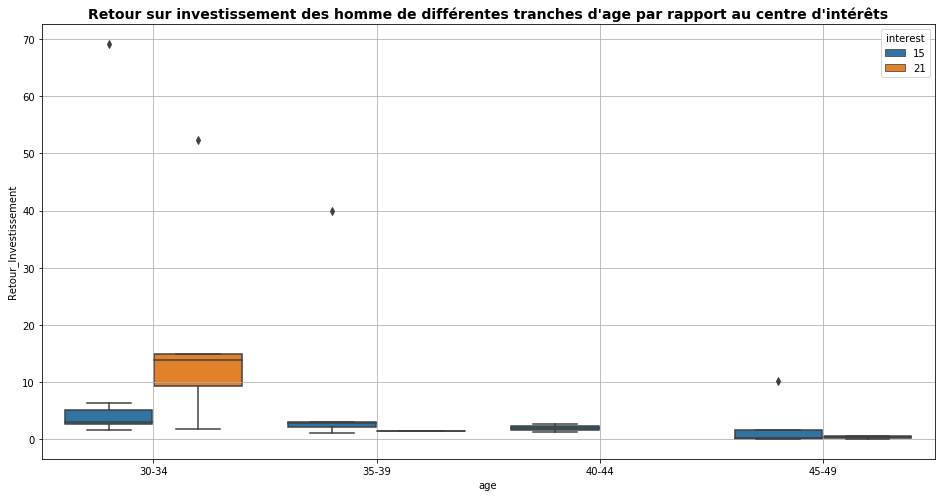

In [198]:
plt.figure(figsize=(16,8))
plt.title("Retour sur investissement des homme de différentes tranches d'age par rapport au centre d'intérêts", fontsize=14, fontweight= 'bold')
sns.boxplot(data=extended_data_filter, x='age', y='Retour_Investissement', showfliers=True , hue='interest')
axes=plt.axes()
axes.grid()
plt.show()

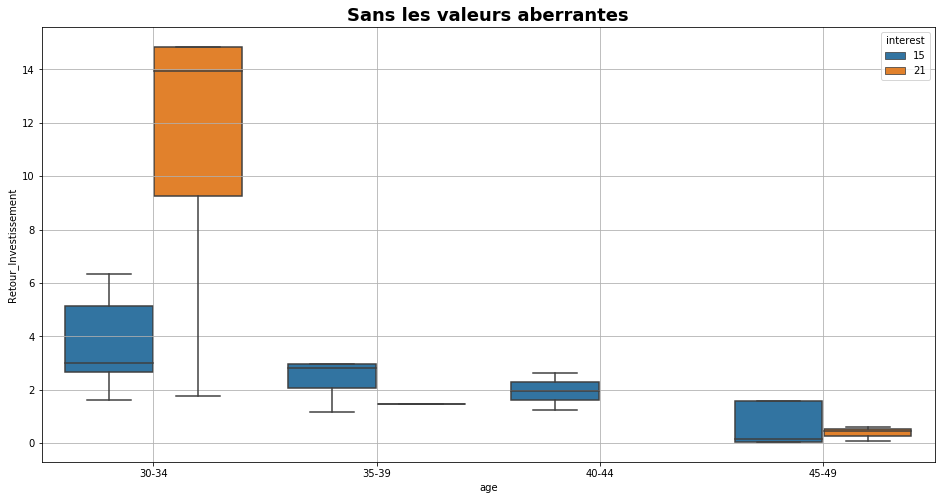

In [199]:
plt.figure(figsize=(16,8))
plt.title('Sans les valeurs aberrantes', fontsize=18, fontweight= 'bold')
sns.boxplot(data=extended_data_filter, x='age', y='Retour_Investissement',showfliers=False , hue='interest')
axes=plt.axes()
axes.grid()
plt.show()

In [200]:
data_afgd=data_afg.describe()
data_afgdi=data_afgd['Retour_Investissement'].describe()
data_afgdi

,count,mean,std,min,25%,50%,75%,max
count,8.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,8.000000
mean,3.875000,inf,9.354197,inf,2.482025,3.396008,4.111183,inf
std,2.295181,NaN,10.183541,NaN,3.133579,4.766632,4.955912,NaN
min,1.000000,0.375985,0.002132,0.042564,0.051261,0.154131,0.524783,0.599520
25%,2.000000,1.823520,0.617144,0.894267,0.867779,0.961070,1.521765,2.336167
50%,4.000000,6.095751,4.407646,1.364112,1.599149,1.940662,2.282175,25.064018
75%,5.000000,13.324245,18.264482,1.651394,2.358621,2.915534,4.038156,56.581313
max,8.000000,inf,23.306351,inf,9.270965,13.924051,14.851485,inf


In [201]:
#Filtrage de l'échantillon: hommes ds catégories d'intéret 15-21
data_filter_extended=data_add_1178[(data_add_1178['gender']=='M')]
data_filter_extended=data_filter_extended[(data_filter_extended['interest']==15)|(data_filter_extended['interest']==21)]
data_filter_extended=data_filter_extended[data_filter_extended.Clicks != 0]
data_filter_extended2=data_filter_extended.loc[data_filter_extended['gender']=='M']
data_filter_extended2=data_filter_extended[['age', 'interest', 'gender','Retour_Investissement', 'Clicks']]

# data groupée age/intérêt 
group_fia=data_filter_extended2.groupby(['age', 'interest'])

#description
desc_group_fia=group_fia['Retour_Investissement'].describe()
#desc_group_fia['median_RI']=pd.Series(group_fia['Retour_Investissement'].median(), index=desc_group_fia)
#desc_group_fia['mean_RI']=pd.Series(group_fia['Retour_Investissement'].mean(), index=desc_group_fia)
#desc_group_fia['clicks']=pd.Series(group_fia['Clicks'].sum(), index=desc_group_fia)

desc_group_fia=desc_group_fia.rename(columns={'mean':'mean_RI'})

desc_group_fiaf=desc_group_fia[['mean_RI']]
desc_group_fiaf['median_RI']=pd.Series(group_fia['Retour_Investissement'].median())
desc_group_fiaf['clicks']=pd.Series(group_fia['Clicks'].sum())
desc_group_fiaf=desc_group_fiaf[['median_RI', 'mean_RI', 'clicks']]
desc_group_fiaf.sort_values(by='mean_RI', ascending=False)

median_RI    mean_RI  clicks
age   interest                              
30-34 21        13.924051  18.439987      58
      15         4.730329  17.221910     495
45-49 15         1.570681   3.976298     138
40-44 15         2.623688   2.623688      26
35-39 15         2.069225   2.021118     168
      21         1.472096   1.472096      44
45-49 21         0.450045   0.375985      98

Il semble qu'on obtient un meilleur retour sur investissement avec les hommes entre 30 et 34 ans. Cependant plus on affine nos observations, plus l'échantillon diminue et monis on peut affirmer nos observations avec certitude.<br>
Une fois qu'on a exploré ces données de manière globale, on peut aussi selectionner certains criteres pour améliorer les observations et les recommandations.

Les objectifs n'ont pas été définis, mais la recherche de rentabilité est le but de toute entreprise. Si la volonté est de promouvoir des achats en ligne, on privilégiera une ligne commerciale plutot qu'une autre. Si l'objectifs est de faire connaitre les produits, on essaiera de cibler les catégories qui génèrent le plus de clic.<br>
Pour calculer le retour sur investissement a proprement parler il faut aussi des données de consultation et d'interaction du site web par les utilisateurs réorientés grace a Facebook.<br>
On peut ainsi acquérir d'autre données à recouper avec notre analyse exploratrice (abonnement newsletter, temps de consultation, nb de pages consultées, retour sur le site, achat...).<br>
On peut également vouloir diffuser a nouveau des pubs aux visiteurs du site.<br>
En attribuant des valeurs aux differents objectifs qu'on définit (sur le site ou pour la campagne marketing Facebook) et en connaissant les informations du visiteur, on pourra mieux juger le rendement des campagnes marketing.<br>
En somme, il faut avoir un ensemble d'objectifs clairs on pourra vraiment explorer les données pour obtenir avec exactitude les résponses dont on a besoin et prendre des décisions en conséquence.

#### Données pour le Sankey (tests dans le notebook sankey dataframe-Copy 1)

In [202]:
dSankey=pd.read_csv("KAG_conversion_data.csv")
dSankey_1178=dSankey.copy()
dSankey_1178=dSankey_1178[dSankey_1178['xyz_campaign_id'].isin([1178])]

In [203]:
dSankey_1178=dSankey_1178[['gender','age','interest','Impressions','Clicks','Total_Conversion','Approved_Conversion']]
data_s_1178=dSankey_1178[(data_1178['interest']==101)|
                         (data_1178['interest']==104)|
                         (data_1178['interest']==15)|
                         (data_1178['interest']==32)|
                         (data_1178['interest']==24)|
                         (data_1178['interest']==21)]

In [204]:
data_s_1178.head()
data_2_1178=data_s_1178.copy()
data_3_1178=data_s_1178.copy()

In [205]:
data_2_1178['rapport_vues_clicks']=data_2_1178['Clicks']/data_2_1178['Impressions']*100
data_2_1178['rapport_clicks_conversion']=data_2_1178['Total_Conversion']/data_2_1178['Clicks']*100
data_2_1178['rapport_conversion_total']=data_2_1178['Approved_Conversion']/data_2_1178['Total_Conversion']*100

In [206]:
data_2_1178.sort_values(by='interest', ascending=True)

,gender,age,interest,Impressions,Clicks,Total_Conversion,Approved_Conversion,rapport_vues_clicks,rapport_clicks_conversion,rapport_conversion_total
523,M,30-34,15,30068,1,1,0,0.003326,100.000000,0.000000
997,F,45-49,15,559554,139,2,0,0.024841,1.438849,0.000000
996,F,45-49,15,662249,163,2,0,0.024613,1.226994,0.000000
951,F,40-44,15,582725,142,9,2,0.024368,6.338028,22.222222
906,F,35-39,15,24664,2,1,1,0.008109,50.000000,100.000000
905,F,35-39,15,132803,25,2,1,0.018825,8.000000,50.000000
828,F,30-34,15,333345,52,5,1,0.015599,9.615385,20.000000
826,F,30-34,15,182265,27,2,1,0.014814,7.407407,50.000000
764,M,45-49,15,250960,42,2,0,0.016736,4.761905,0.000000
763,M,45-49,15,506916,89,2,2,0.017557,2.247191,100.000000


In [207]:
print("Nombre homme et femmes:\n", data_2_1178.gender.value_counts())
print("\nCatégories d'age:\n", data_2_1178.age.value_counts())
print("\nCatégorie de centre d'intéret:\n", data_2_1178.interest.value_counts())
print("\nClics générés:", data_2_1178.Clicks.sum(),"\n")
print("Nb d'infos prises:", data_2_1178.Total_Conversion.sum(),"\n")
print("Nb d'achat:", data_2_1178.Approved_Conversion.sum())

Nombre homme et femmes:
 M    49
F    42
Name: gender, dtype: int64

Catégories d'age:
 30-34    34
35-39    20
45-49    20
40-44    17
Name: age, dtype: int64

Catégorie de centre d'intéret:
 21     22
32     21
15     20
24     16
101     7
104     5
Name: interest, dtype: int64

Clics générés: 4375 

Nb d'infos prises: 424 

Nb d'achat: 143


In [208]:
group_agi=data_3_1178.groupby(['gender','age','interest'])

In [209]:
count_impressions=group_agi['Impressions'].count() #nb de campagnes
sum_impressions=group_agi['Impressions'].sum() #total visionnage du groupe
count_clicks=group_agi['Clicks'].count()
sum_clicks=group_agi['Clicks'].sum() #nb de clics par groupe
count_totconv=group_agi['Total_Conversion'].count()
sum_totconv=group_agi['Total_Conversion'].sum() #nb infos prises
count_appconv=group_agi['Approved_Conversion'].count()
sum_appconv=group_agi['Approved_Conversion'].sum()  #nb achats

In [210]:
sum_clicks

gender  age    interest
F       30-34  15          256
               21          105
               24           84
               32          181
               101          81
               104          76
        35-39  15           27
               21           65
               24           62
               32           50
               101         167
        40-44  15          142
               21           60
               32          111
               101         152
               104          58
        45-49  15          302
               21           63
               24           37
               101         107
               104         110
M       30-34  15          495
               21           58
               24           30
               32           48
               101           5
        35-39  15          168
               21           44
               24           65
               32          180
               101           2
        40-44  

In [211]:
s_impressions=pd.Series(sum_impressions)
s_clicks=pd.Series(sum_clicks)
s_totconv=pd.Series(sum_totconv)
s_appconv=pd.Series(sum_appconv)
desc=group_agi['Impressions'].describe()
final_desc=desc[[]]

In [212]:
result=pd.concat([final_desc, s_impressions, s_clicks, s_totconv, s_appconv], axis=1)
result=result.rename(columns={'Impressions':'nb_vues', 'Clicks':'nb_clics', 'Total_Conversion':'nb_visites', 'Approved_Conversion':'nb_achats'})
result

nb_vues  nb_clics  nb_visites  nb_achats
gender age   interest                                          
F      30-34 15        1632981       256          33          7
             21         654193       105          22          9
             24         455139        84           6          2
             32        1237675       181          21         11
             101        524306        81          10          4
             104        442919        76          21          2
       35-39 15         157467        27           3          2
             21         283220        65           5          2
             24         228664        62           5          1
             32         222378        50           1          0
             101        975884       167          14          3
       40-44 15         582725       142           9          2
             21         262250        60           5          1
             32         460538       111           3          0
             101        696612       152          31          9
             104        267316        58           3          0
       45-49 15        1221803       302           4          0
             21         224291        63           3          1
             24          99250        37           2          1
             101        589270       107          10          4
             104        558666       110          14          5
M      30-34 15        4737422       495          94         31
             21         546558        58          12          7
             24         276299        30           6          2
             32         484812        48           6          1
             101         72228         5           4          4
       35-39 15        1150574       168           8          4
             21         292834        44           4          1
             24         469952        65           6          2
             32        1236434       180          13          8
             101         33534         2           1          1
       40-44 15         163181        26           1          1
             21           7073         0           1          0
             24         347409        51           2          0
             32         666046       130           7          4
             101         68619        10           1          0
             104         17559         1           1          1
       45-49 15         812113       138           6          3
             21         506754        98           5          0
             24         355165        81           4          3
             32        2114362       429          13          4
             104        125650        20           4          0

In [216]:
result.iloc[0][1]

256